# Generate A/B compartments from Hi-C matrices 
## from GSE99363

by Pu Zheng

2022.05.03

Data from: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE99363

Citation: https://www.nature.com/articles/ng.3906

In [1]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

27332


# 0. Load processed hic_matrices

In [2]:
hic_save_folder = r'W:\HiC_cortex\hic_map_cortex_20kb'

In [20]:
import pandas as pd
hic_reg_df = pd.read_csv(os.path.join(hic_save_folder, 'filtered_regions.csv'))
hic_reg_df

chr     start       end    name
0         1         0     20000       1
1         1     20000     40000       2
2         1     40000     60000       3
3         1     60000     80000       4
4         1     80000    100000       5
...     ...       ...       ...     ...
127731   20  91660000  91680000  136284
127732   20  91680000  91700000  136285
127733   20  91700000  91720000  136286
127734   20  91720000  91740000  136287
127735   20  91740000  91744698  136288

[127736 rows x 4 columns]

In [21]:
import re
# load 20kb hic matrices
chr_2_contacts = {}
for _fl in os.listdir(hic_save_folder):
    _match = re.search(r'.*_chr_(?P<chr_name>[0-9XY]+).npy', _fl)
    if _match is not None:
        chr_2_contacts[int(_match.groupdict()['chr_name'])] = \
        np.load(os.path.join(hic_save_folder, _fl))    

In [22]:
# function to compress the hi-c count map by binning the previusoly merged bins
def compress_hic_map (hic_count_map, compress_size =1): 
    
    print(f'-- Input count map shape is {hic_count_map.shape}.')
    if len(hic_count_map.shape) !=2 or hic_count_map.shape[0]!=hic_count_map.shape[1]:
        print(f'-- Input count map is invalid.')
        return None
    
    # add empty pseduo bins if the last ctp loci does not have enough hic bins to merge
    if len(hic_count_map)%compress_size !=0:
        print(f'-- Add empty bins to the input map to enable the compression.')
        residual = len(hic_count_map)%compress_size
        add_num = compress_size - residual 
        new_dim = len(hic_count_map)+add_num
        new_hic_count_map = np.zeros([new_dim,new_dim])
        new_hic_count_map[:len(hic_count_map),:len(hic_count_map)]=hic_count_map
        hic_count_map =new_hic_count_map
        
    print(f'-- Summing the input count map over every {compress_size} loci')
    # reshape to split the rows into (splitted_rows, compress_size, cols ) and sum the splitted_row along the compression-axis
    new_row_num = int(hic_count_map.shape[-1]/compress_size)
    sum_count_row = hic_count_map.reshape(new_row_num,compress_size,hic_count_map.shape[-1]).sum(1) #sum along axis 1
    # reshape to split the col into (splitted_rows, compress_size, splitted_cols) and splitted_cols along the compression-axis
    new_col_num = new_row_num
    sum_count_row_col = sum_count_row.reshape(new_row_num,new_col_num,compress_size).sum(2) #sum along axis 2
    #print(sum_count_row_col.shape)
    
    return sum_count_row_col

In [23]:
%matplotlib inline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

fitting_type = 'polynomial'
merge_bins = 2

from scipy.ndimage import gaussian_filter
from numpy import ma

gaussian_sigma = 1.5

make_plots = True

save_genomic_resolution = '40k'
overwrite = False

AB_savefile = os.path.join(hic_save_folder, 
                           f'AB_comp_{save_genomic_resolution}.hdf5')

-- Input count map shape is (9774, 9774).
-- Summing the input count map over every 2 loci


C:\Users\puzheng\AppData\Local\Temp/ipykernel_27332/4046236800.py:37: RuntimeWarning: divide by zero encountered in log
  hic_gdist_norm = np.exp(np.polyval(hic_poly, np.log(merged_gdist_map)))
E:\Users\puzheng\anaconda3\envs\ia3_postanalysis\lib\site-packages\numpy\lib\polynomial.py:771: RuntimeWarning: invalid value encountered in multiply
  y = y * x + p[i]


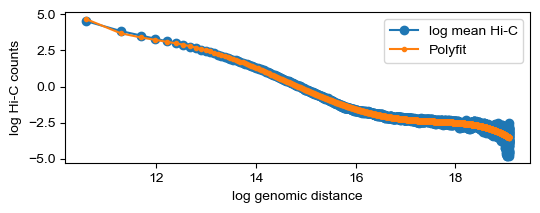

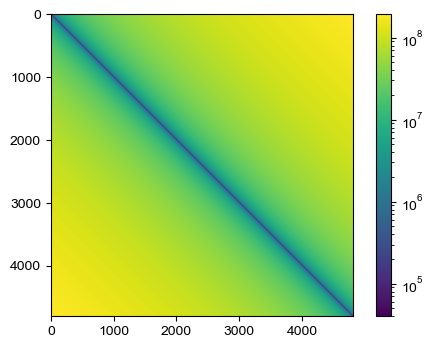

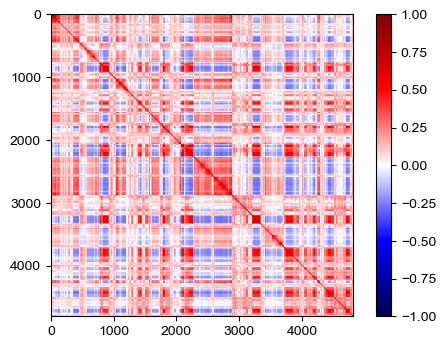

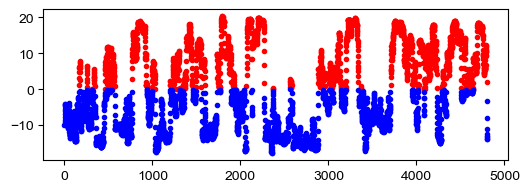

- corr_map exists
- reg_starts exists
- pc1_vector exists
- fitting_type exists
- gaussian_sigma exists
-- Input count map shape is (6535, 6535).
-- Add empty bins to the input map to enable the compression.
-- Summing the input count map over every 2 loci


C:\Users\puzheng\AppData\Local\Temp/ipykernel_27332/4046236800.py:37: RuntimeWarning: divide by zero encountered in log
  hic_gdist_norm = np.exp(np.polyval(hic_poly, np.log(merged_gdist_map)))
E:\Users\puzheng\anaconda3\envs\ia3_postanalysis\lib\site-packages\numpy\lib\polynomial.py:771: RuntimeWarning: invalid value encountered in multiply
  y = y * x + p[i]


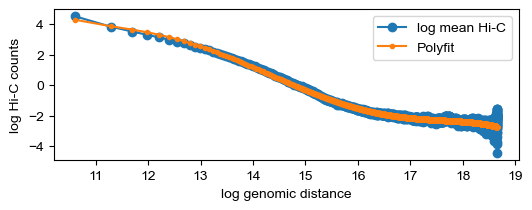

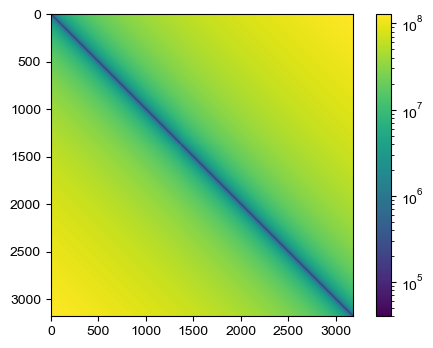

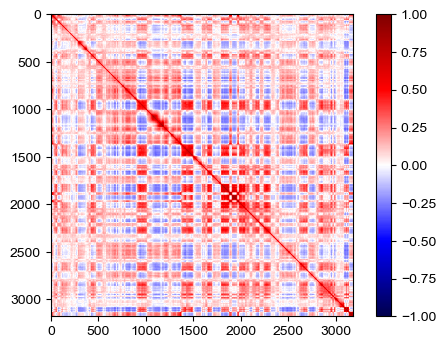

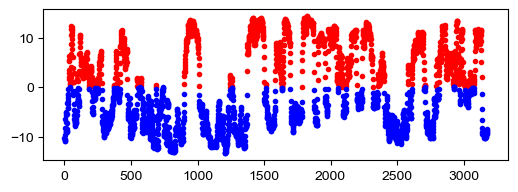

- saving corr_map
- saving reg_starts
- saving pc1_vector
- saving fitting_type
- saving gaussian_sigma
-- Input count map shape is (6105, 6105).
-- Add empty bins to the input map to enable the compression.
-- Summing the input count map over every 2 loci


C:\Users\puzheng\AppData\Local\Temp/ipykernel_27332/4046236800.py:37: RuntimeWarning: divide by zero encountered in log
  hic_gdist_norm = np.exp(np.polyval(hic_poly, np.log(merged_gdist_map)))
E:\Users\puzheng\anaconda3\envs\ia3_postanalysis\lib\site-packages\numpy\lib\polynomial.py:771: RuntimeWarning: invalid value encountered in multiply
  y = y * x + p[i]


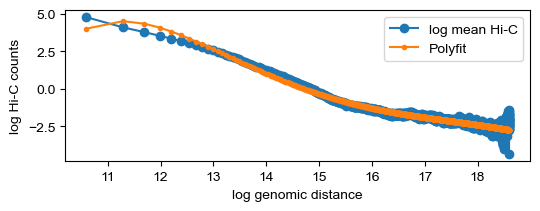

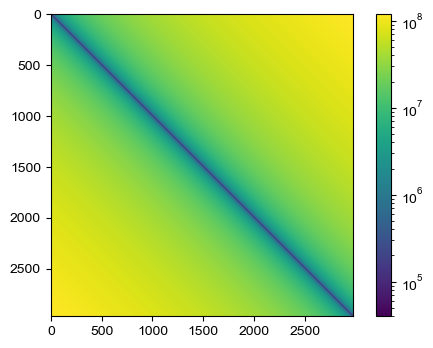

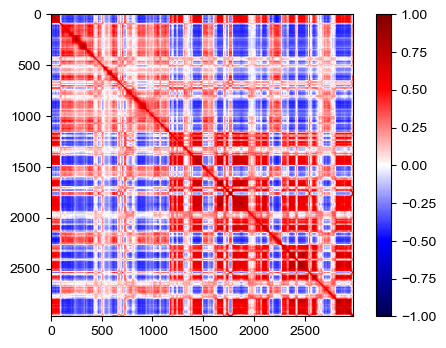

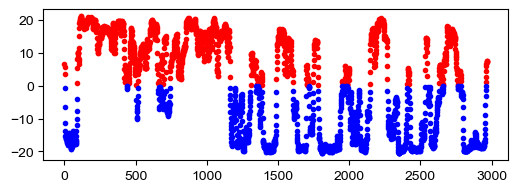

- saving corr_map
- saving reg_starts
- saving pc1_vector
- saving fitting_type
- saving gaussian_sigma
-- Input count map shape is (6007, 6007).
-- Add empty bins to the input map to enable the compression.
-- Summing the input count map over every 2 loci


C:\Users\puzheng\AppData\Local\Temp/ipykernel_27332/4046236800.py:37: RuntimeWarning: divide by zero encountered in log
  hic_gdist_norm = np.exp(np.polyval(hic_poly, np.log(merged_gdist_map)))
E:\Users\puzheng\anaconda3\envs\ia3_postanalysis\lib\site-packages\numpy\lib\polynomial.py:771: RuntimeWarning: invalid value encountered in multiply
  y = y * x + p[i]


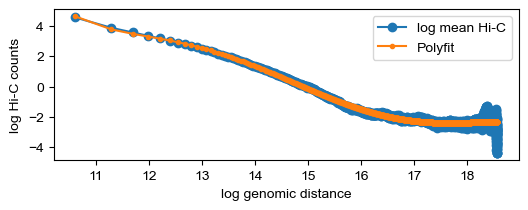

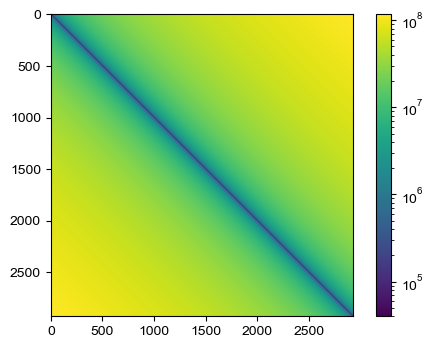

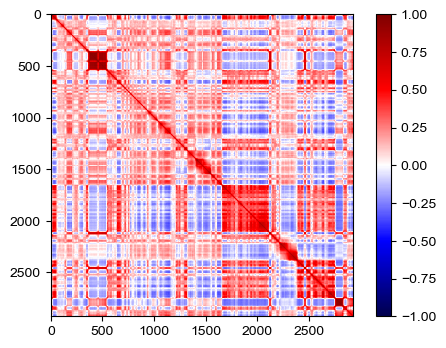

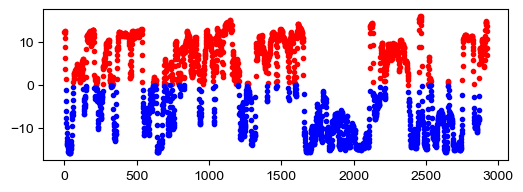

- saving corr_map
- saving reg_starts
- saving pc1_vector
- saving fitting_type
- saving gaussian_sigma
-- Input count map shape is (6022, 6022).
-- Summing the input count map over every 2 loci


C:\Users\puzheng\AppData\Local\Temp/ipykernel_27332/4046236800.py:37: RuntimeWarning: divide by zero encountered in log
  hic_gdist_norm = np.exp(np.polyval(hic_poly, np.log(merged_gdist_map)))
E:\Users\puzheng\anaconda3\envs\ia3_postanalysis\lib\site-packages\numpy\lib\polynomial.py:771: RuntimeWarning: invalid value encountered in multiply
  y = y * x + p[i]


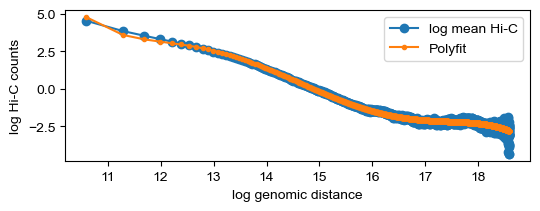

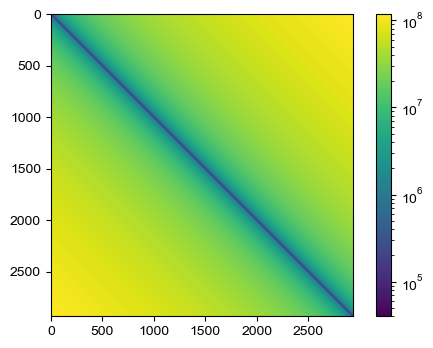

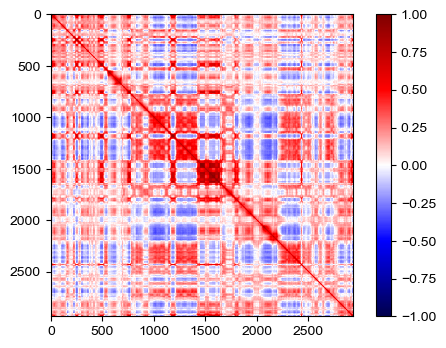

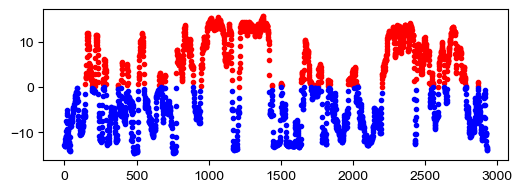

- saving corr_map
- saving reg_starts
- saving pc1_vector
- saving fitting_type
- saving gaussian_sigma
-- Input count map shape is (6246, 6246).
-- Summing the input count map over every 2 loci


C:\Users\puzheng\AppData\Local\Temp/ipykernel_27332/4046236800.py:37: RuntimeWarning: divide by zero encountered in log
  hic_gdist_norm = np.exp(np.polyval(hic_poly, np.log(merged_gdist_map)))
E:\Users\puzheng\anaconda3\envs\ia3_postanalysis\lib\site-packages\numpy\lib\polynomial.py:771: RuntimeWarning: invalid value encountered in multiply
  y = y * x + p[i]


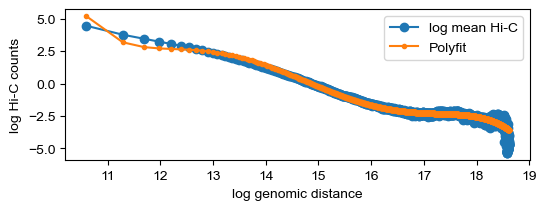

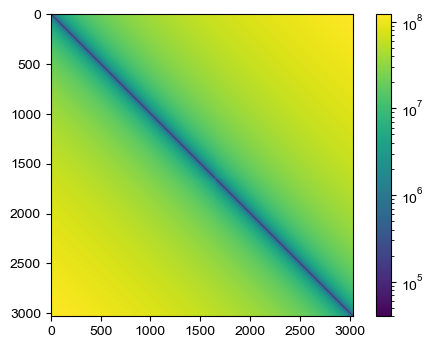

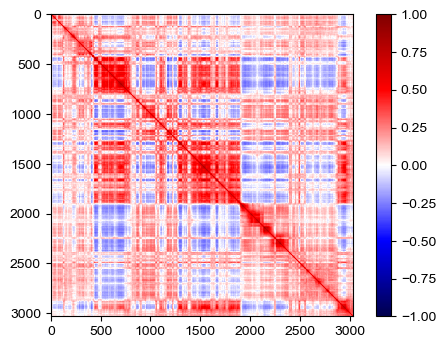

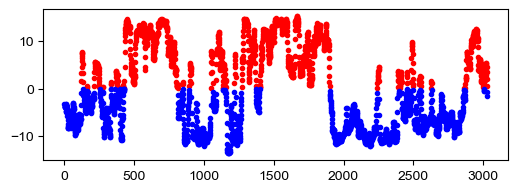

- saving corr_map
- saving reg_starts
- saving pc1_vector
- saving fitting_type
- saving gaussian_sigma
-- Input count map shape is (5203, 5203).
-- Add empty bins to the input map to enable the compression.
-- Summing the input count map over every 2 loci


C:\Users\puzheng\AppData\Local\Temp/ipykernel_27332/4046236800.py:37: RuntimeWarning: divide by zero encountered in log
  hic_gdist_norm = np.exp(np.polyval(hic_poly, np.log(merged_gdist_map)))
E:\Users\puzheng\anaconda3\envs\ia3_postanalysis\lib\site-packages\numpy\lib\polynomial.py:771: RuntimeWarning: invalid value encountered in multiply
  y = y * x + p[i]


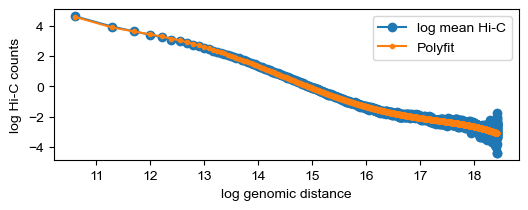

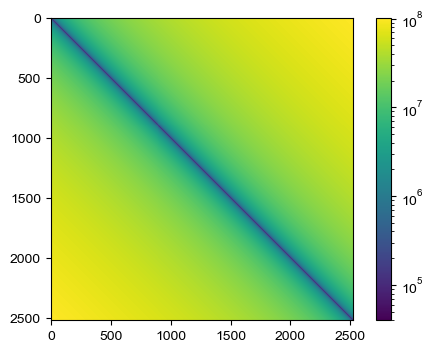

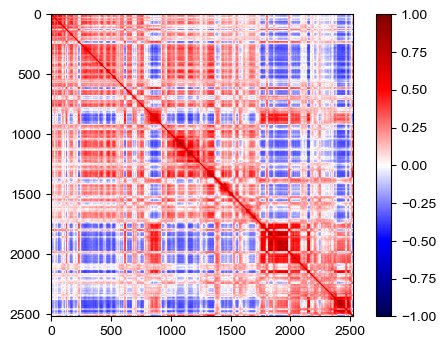

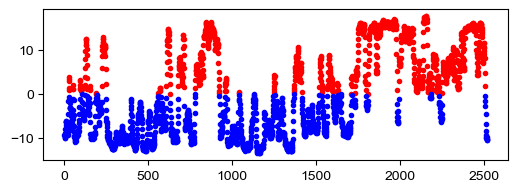

- saving corr_map
- saving reg_starts
- saving pc1_vector
- saving fitting_type
- saving gaussian_sigma
-- Input count map shape is (4911, 4911).
-- Add empty bins to the input map to enable the compression.
-- Summing the input count map over every 2 loci


C:\Users\puzheng\AppData\Local\Temp/ipykernel_27332/4046236800.py:37: RuntimeWarning: divide by zero encountered in log
  hic_gdist_norm = np.exp(np.polyval(hic_poly, np.log(merged_gdist_map)))
E:\Users\puzheng\anaconda3\envs\ia3_postanalysis\lib\site-packages\numpy\lib\polynomial.py:771: RuntimeWarning: invalid value encountered in multiply
  y = y * x + p[i]


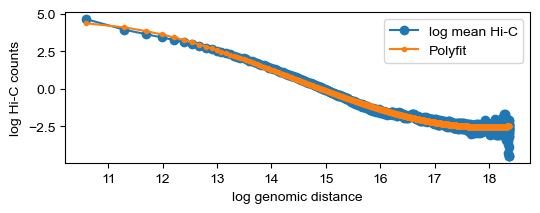

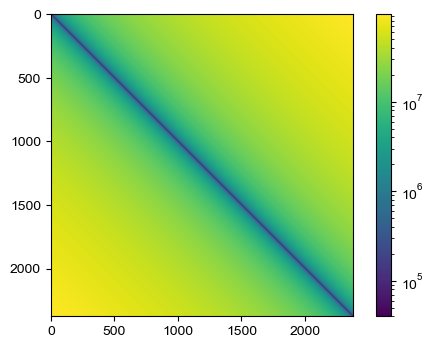

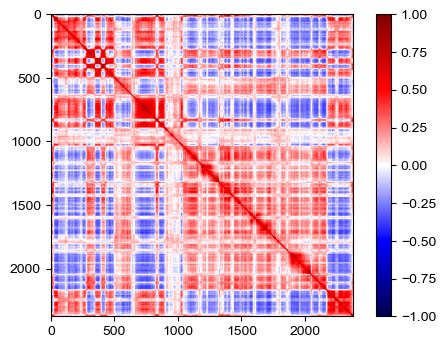

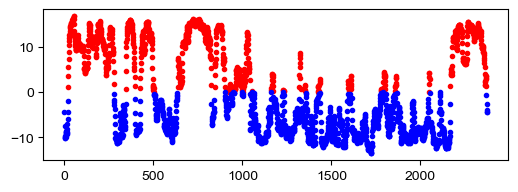

- saving corr_map
- saving reg_starts
- saving pc1_vector
- saving fitting_type
- saving gaussian_sigma
-- Input count map shape is (4750, 4750).
-- Summing the input count map over every 2 loci


C:\Users\puzheng\AppData\Local\Temp/ipykernel_27332/4046236800.py:37: RuntimeWarning: divide by zero encountered in log
  hic_gdist_norm = np.exp(np.polyval(hic_poly, np.log(merged_gdist_map)))
E:\Users\puzheng\anaconda3\envs\ia3_postanalysis\lib\site-packages\numpy\lib\polynomial.py:771: RuntimeWarning: invalid value encountered in multiply
  y = y * x + p[i]


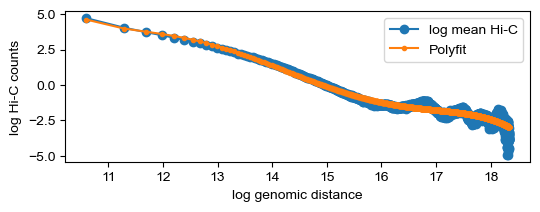

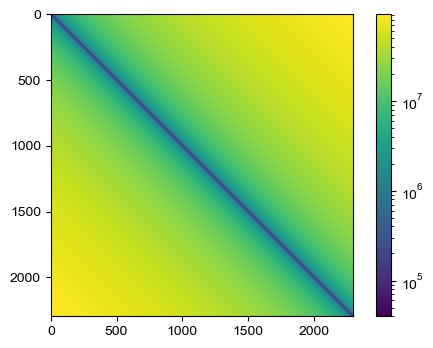

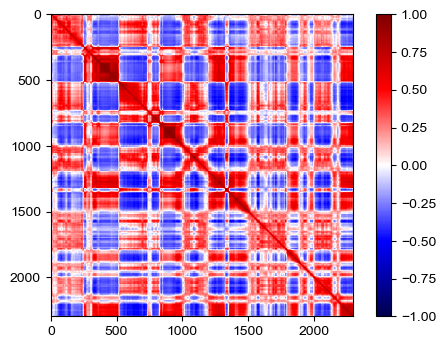

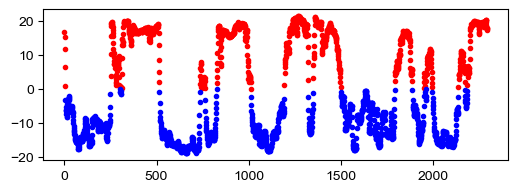

- saving corr_map
- saving reg_starts
- saving pc1_vector
- saving fitting_type
- saving gaussian_sigma
-- Input count map shape is (4536, 4536).
-- Summing the input count map over every 2 loci


C:\Users\puzheng\AppData\Local\Temp/ipykernel_27332/4046236800.py:37: RuntimeWarning: divide by zero encountered in log
  hic_gdist_norm = np.exp(np.polyval(hic_poly, np.log(merged_gdist_map)))
E:\Users\puzheng\anaconda3\envs\ia3_postanalysis\lib\site-packages\numpy\lib\polynomial.py:771: RuntimeWarning: invalid value encountered in multiply
  y = y * x + p[i]


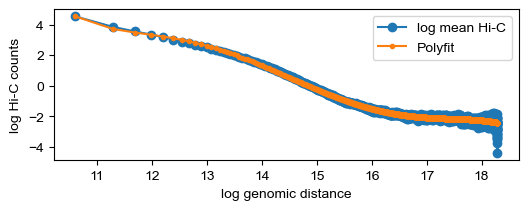

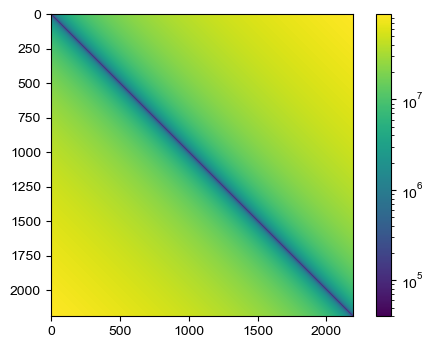

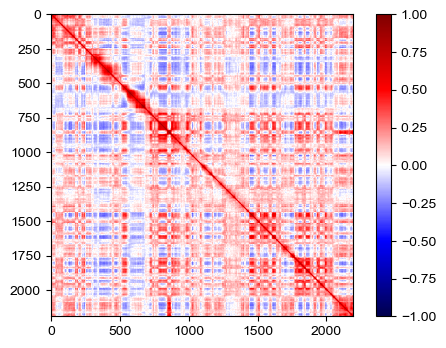

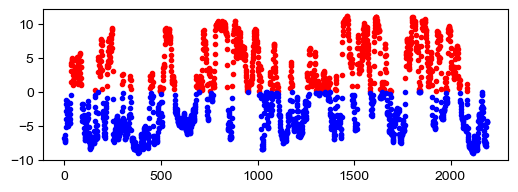

- saving corr_map
- saving reg_starts
- saving pc1_vector
- saving fitting_type
- saving gaussian_sigma
-- Input count map shape is (3072, 3072).
-- Summing the input count map over every 2 loci


C:\Users\puzheng\AppData\Local\Temp/ipykernel_27332/4046236800.py:37: RuntimeWarning: divide by zero encountered in log
  hic_gdist_norm = np.exp(np.polyval(hic_poly, np.log(merged_gdist_map)))
E:\Users\puzheng\anaconda3\envs\ia3_postanalysis\lib\site-packages\numpy\lib\polynomial.py:771: RuntimeWarning: invalid value encountered in multiply
  y = y * x + p[i]


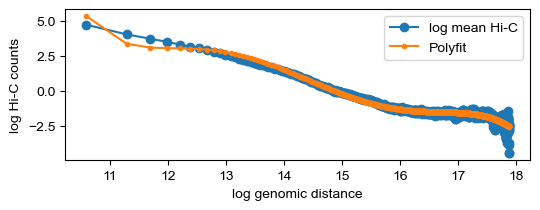

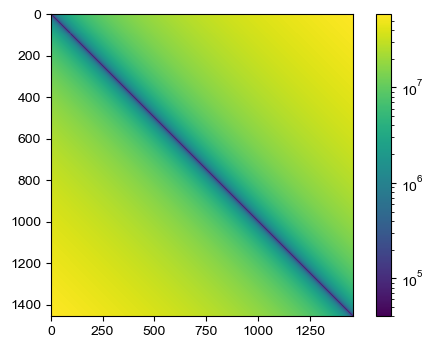

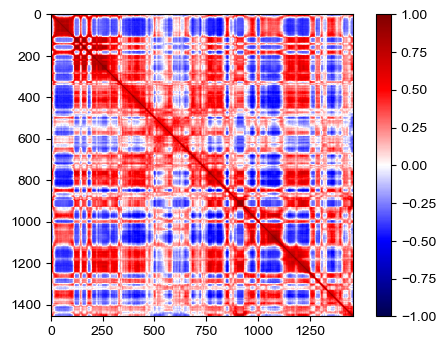

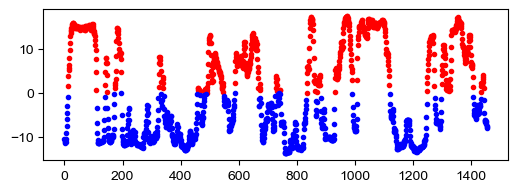

- saving corr_map
- saving reg_starts
- saving pc1_vector
- saving fitting_type
- saving gaussian_sigma
-- Input count map shape is (9106, 9106).
-- Summing the input count map over every 2 loci


C:\Users\puzheng\AppData\Local\Temp/ipykernel_27332/4046236800.py:37: RuntimeWarning: divide by zero encountered in log
  hic_gdist_norm = np.exp(np.polyval(hic_poly, np.log(merged_gdist_map)))
E:\Users\puzheng\anaconda3\envs\ia3_postanalysis\lib\site-packages\numpy\lib\polynomial.py:771: RuntimeWarning: invalid value encountered in multiply
  y = y * x + p[i]


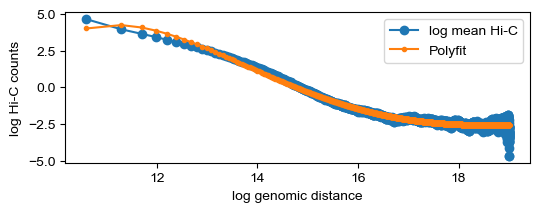

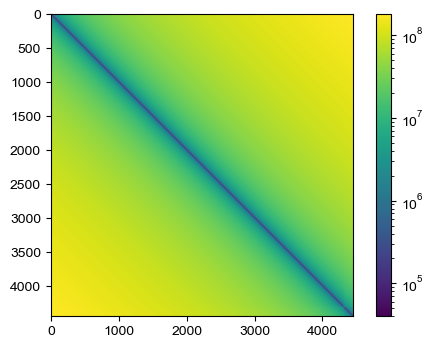

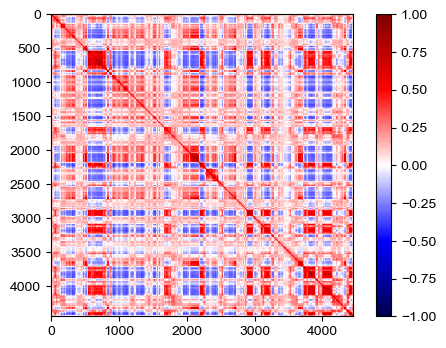

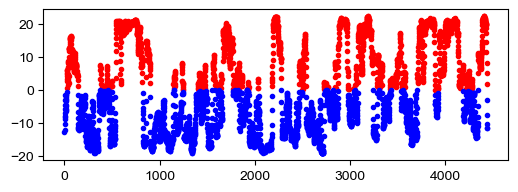

- saving corr_map
- saving reg_starts
- saving pc1_vector
- saving fitting_type
- saving gaussian_sigma
-- Input count map shape is (8002, 8002).
-- Summing the input count map over every 2 loci


C:\Users\puzheng\AppData\Local\Temp/ipykernel_27332/4046236800.py:37: RuntimeWarning: divide by zero encountered in log
  hic_gdist_norm = np.exp(np.polyval(hic_poly, np.log(merged_gdist_map)))
E:\Users\puzheng\anaconda3\envs\ia3_postanalysis\lib\site-packages\numpy\lib\polynomial.py:771: RuntimeWarning: invalid value encountered in multiply
  y = y * x + p[i]


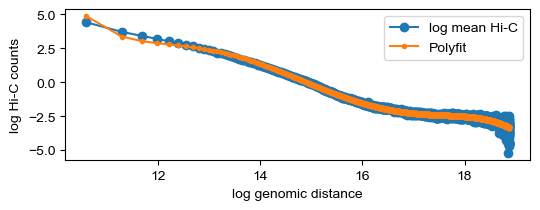

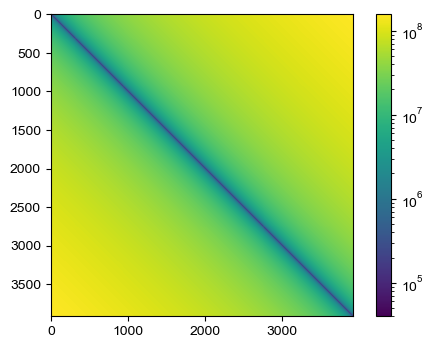

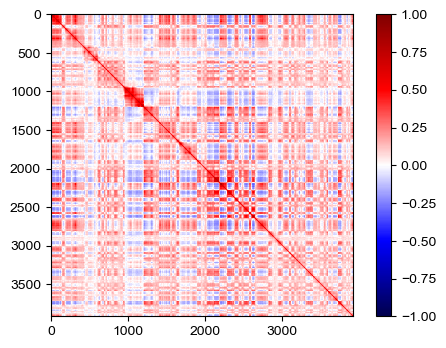

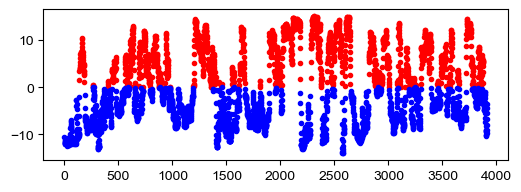

- saving corr_map
- saving reg_starts
- saving pc1_vector
- saving fitting_type
- saving gaussian_sigma
-- Input count map shape is (7826, 7826).
-- Summing the input count map over every 2 loci


C:\Users\puzheng\AppData\Local\Temp/ipykernel_27332/4046236800.py:37: RuntimeWarning: divide by zero encountered in log
  hic_gdist_norm = np.exp(np.polyval(hic_poly, np.log(merged_gdist_map)))
E:\Users\puzheng\anaconda3\envs\ia3_postanalysis\lib\site-packages\numpy\lib\polynomial.py:771: RuntimeWarning: invalid value encountered in multiply
  y = y * x + p[i]


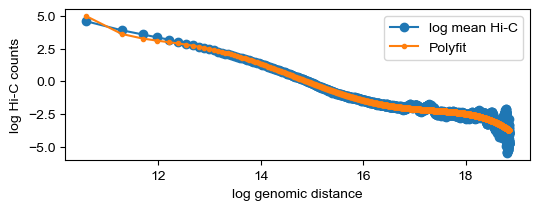

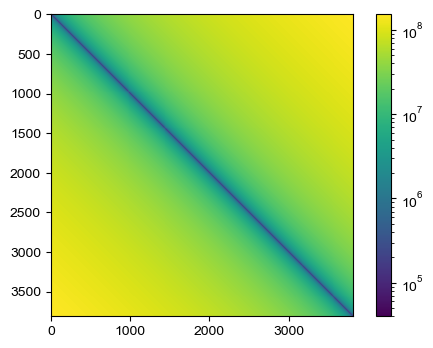

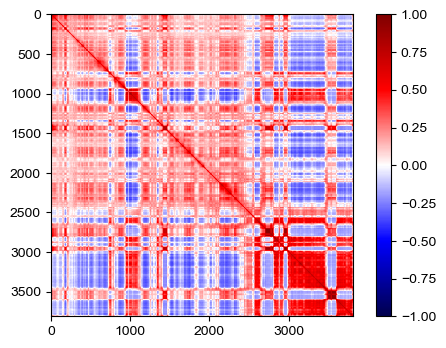

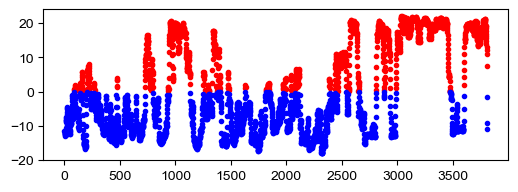

- saving corr_map
- saving reg_starts
- saving pc1_vector
- saving fitting_type
- saving gaussian_sigma
-- Input count map shape is (7592, 7592).
-- Summing the input count map over every 2 loci


C:\Users\puzheng\AppData\Local\Temp/ipykernel_27332/4046236800.py:37: RuntimeWarning: divide by zero encountered in log
  hic_gdist_norm = np.exp(np.polyval(hic_poly, np.log(merged_gdist_map)))
E:\Users\puzheng\anaconda3\envs\ia3_postanalysis\lib\site-packages\numpy\lib\polynomial.py:771: RuntimeWarning: invalid value encountered in multiply
  y = y * x + p[i]


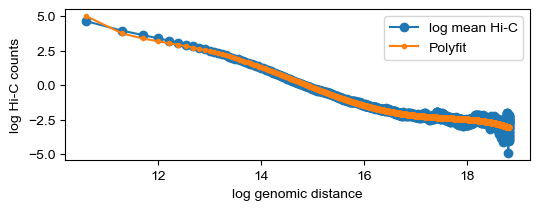

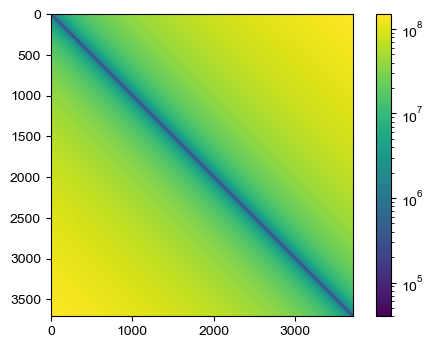

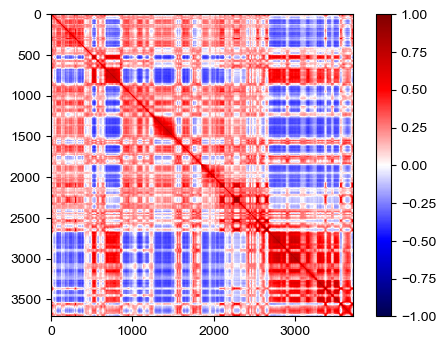

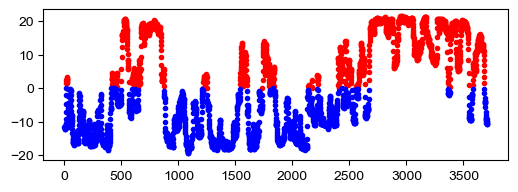

- saving corr_map
- saving reg_starts
- saving pc1_vector
- saving fitting_type
- saving gaussian_sigma
-- Input count map shape is (7487, 7487).
-- Add empty bins to the input map to enable the compression.
-- Summing the input count map over every 2 loci


C:\Users\puzheng\AppData\Local\Temp/ipykernel_27332/4046236800.py:37: RuntimeWarning: divide by zero encountered in log
  hic_gdist_norm = np.exp(np.polyval(hic_poly, np.log(merged_gdist_map)))
E:\Users\puzheng\anaconda3\envs\ia3_postanalysis\lib\site-packages\numpy\lib\polynomial.py:771: RuntimeWarning: invalid value encountered in multiply
  y = y * x + p[i]


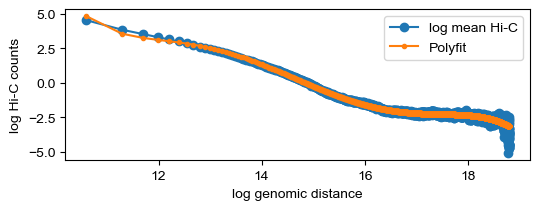

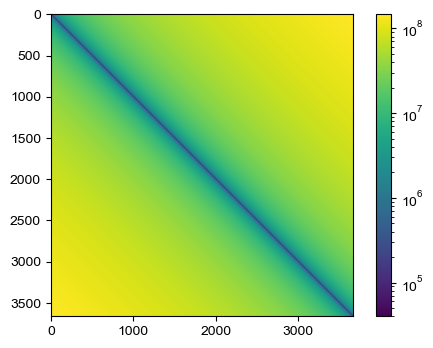

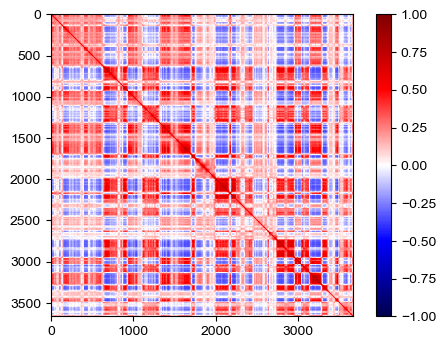

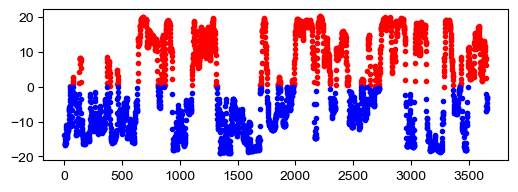

- saving corr_map
- saving reg_starts
- saving pc1_vector
- saving fitting_type
- saving gaussian_sigma
-- Input count map shape is (7273, 7273).
-- Add empty bins to the input map to enable the compression.
-- Summing the input count map over every 2 loci


C:\Users\puzheng\AppData\Local\Temp/ipykernel_27332/4046236800.py:37: RuntimeWarning: divide by zero encountered in log
  hic_gdist_norm = np.exp(np.polyval(hic_poly, np.log(merged_gdist_map)))
E:\Users\puzheng\anaconda3\envs\ia3_postanalysis\lib\site-packages\numpy\lib\polynomial.py:771: RuntimeWarning: invalid value encountered in multiply
  y = y * x + p[i]


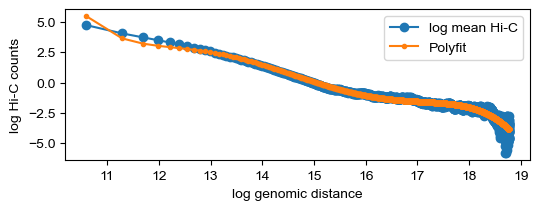

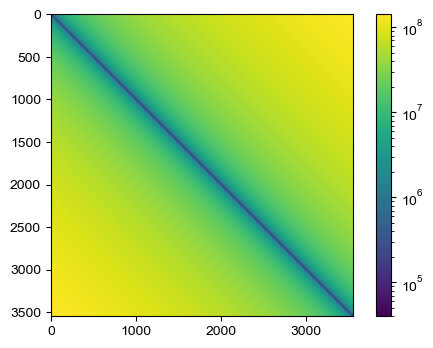

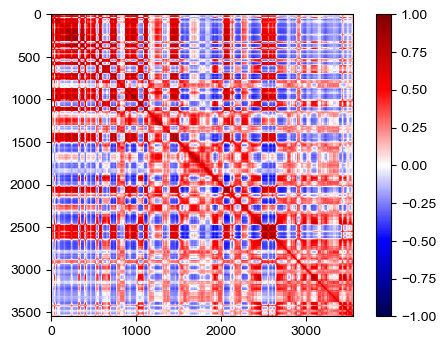

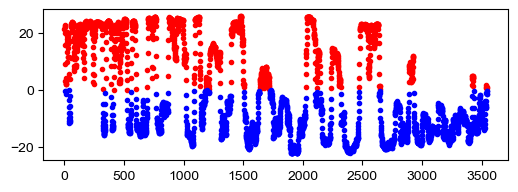

- saving corr_map
- saving reg_starts
- saving pc1_vector
- saving fitting_type
- saving gaussian_sigma
-- Input count map shape is (6471, 6471).
-- Add empty bins to the input map to enable the compression.
-- Summing the input count map over every 2 loci


C:\Users\puzheng\AppData\Local\Temp/ipykernel_27332/4046236800.py:37: RuntimeWarning: divide by zero encountered in log
  hic_gdist_norm = np.exp(np.polyval(hic_poly, np.log(merged_gdist_map)))
E:\Users\puzheng\anaconda3\envs\ia3_postanalysis\lib\site-packages\numpy\lib\polynomial.py:771: RuntimeWarning: invalid value encountered in multiply
  y = y * x + p[i]


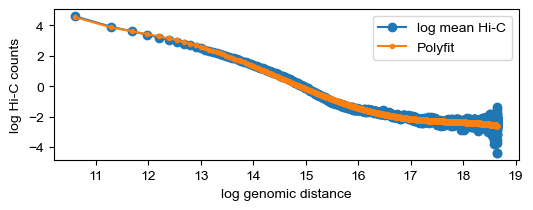

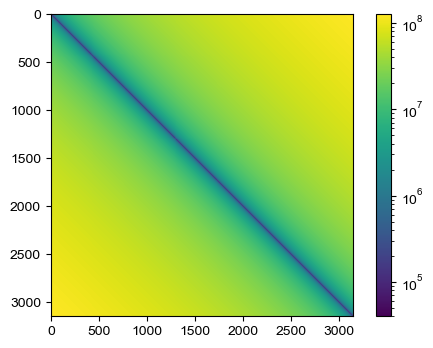

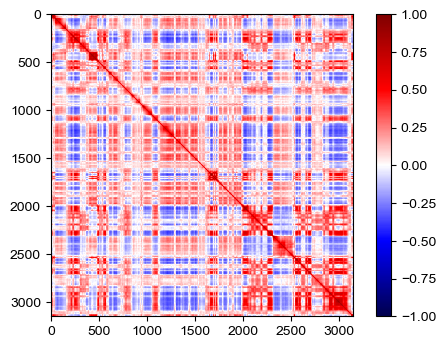

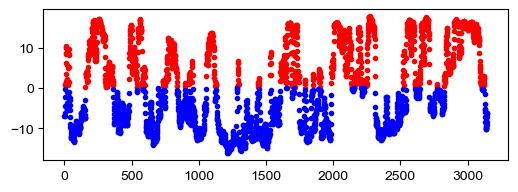

- saving corr_map
- saving reg_starts
- saving pc1_vector
- saving fitting_type
- saving gaussian_sigma
-- Input count map shape is (6230, 6230).
-- Summing the input count map over every 2 loci


C:\Users\puzheng\AppData\Local\Temp/ipykernel_27332/4046236800.py:37: RuntimeWarning: divide by zero encountered in log
  hic_gdist_norm = np.exp(np.polyval(hic_poly, np.log(merged_gdist_map)))
E:\Users\puzheng\anaconda3\envs\ia3_postanalysis\lib\site-packages\numpy\lib\polynomial.py:771: RuntimeWarning: invalid value encountered in multiply
  y = y * x + p[i]


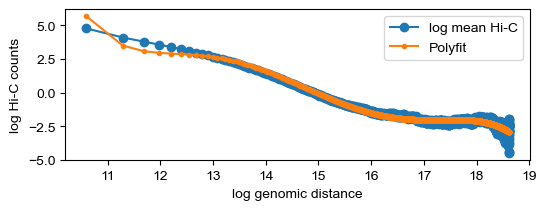

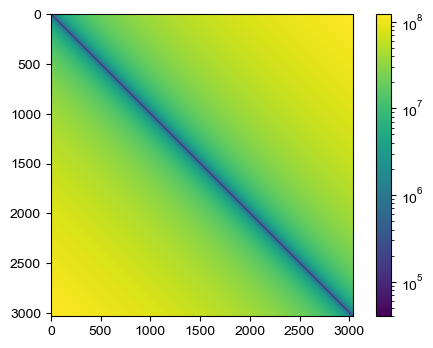

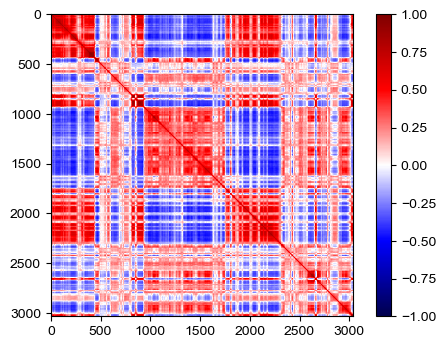

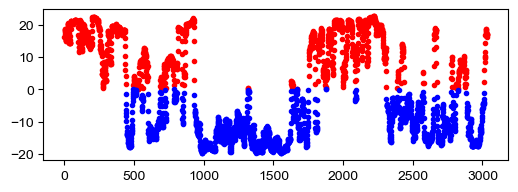

- saving corr_map
- saving reg_starts
- saving pc1_vector
- saving fitting_type
- saving gaussian_sigma


In [25]:
#_chr = 2
#_chr_mat = chr_2_contacts[_chr]

for _chr, _chr_mat in chr_2_contacts.items():
    # region_dataframe
    _chr_reg_df = hic_reg_df.loc[hic_reg_df['chr']==_chr]
    _chr_reg_starts = _chr_reg_df['start'].values
    # merge resolution
    merged_hic_map = compress_hic_map(_chr_mat, merge_bins)
    merged_gstarts = _chr_reg_starts[::merge_bins]

    from scipy.spatial.distance import pdist, squareform
    merged_gdist_map = squareform(pdist(merged_gstarts[:,np.newaxis]))
    # prepare variables for fitting
    gdist_entries = merged_gdist_map[np.triu_indices(len(merged_gdist_map),1)]
    hic_entries = merged_hic_map[np.triu_indices(len(merged_hic_map),1)]

    dists = np.unique(gdist_entries)
    valid_dists = []
    mean_counts = []
    zero_fracs = []
    for _d in dists:
        _cts = hic_entries[np.where(gdist_entries==_d)]
        _zero_fr = np.mean(_cts==0)
        if _zero_fr < 1:
            valid_dists.append(_d)
            mean_counts.append(np.mean(_cts))
            zero_fracs.append(_zero_fr)
    # regression
    if fitting_type == 'linear':
        hic_lr = scipy.stats.linregress(np.log(valid_dists), np.log(mean_counts))
        est_hic_counts = (np.log(valid_dists) * hic_lr.slope + hic_lr.intercept)
        hic_gdist_norm = np.exp(np.log(merged_gdist_map) * hic_lr.slope + hic_lr.intercept)
    if fitting_type == 'polynomial':
        hic_poly = np.polyfit(np.log(valid_dists), np.log(mean_counts) ,deg=5)
        est_hic_counts = np.polyval(hic_poly, np.log(valid_dists))
        hic_gdist_norm = np.exp(np.polyval(hic_poly, np.log(merged_gdist_map)))
    # normalize hic_map    
    hic_gdist_norm[np.arange(len(hic_gdist_norm)),np.arange(len(hic_gdist_norm))] = 1e10
    hic_normed_map = merged_hic_map / hic_gdist_norm
    # select valid indices with nonzero correlations
    valid_inds = np.where(hic_normed_map.sum(0) > 0)[0]
    # filter reg_starts and gdist_map
    sel_reg_starts = merged_gstarts[valid_inds]
    sel_gdist_map = merged_gdist_map[valid_inds, valid_inds[:,np.newaxis]]
    # Calculate correlation matrix
    hic_corr_map = np.corrcoef(gaussian_filter(hic_normed_map[valid_inds, valid_inds[:,np.newaxis]], gaussian_sigma))
    # Calculate PCA
    hic_model = PCA(1)
    hic_model.fit(hic_corr_map)
    hic_pc1 = np.reshape(hic_model.fit_transform(hic_corr_map), -1)
    
    # Plot
    if make_plots:
        plt.figure(figsize=(6,2), dpi=100)
        plt.plot(np.log(valid_dists), np.log(mean_counts), '-o', label='log mean Hi-C')
        plt.plot(np.log(valid_dists), est_hic_counts, '.-', label='Polyfit')
        plt.xlabel('log genomic distance')
        plt.ylabel('log Hi-C counts')
        plt.legend()
        plt.show()
        plt.figure(dpi=100)
        plt.imshow(sel_gdist_map, norm=LogNorm())
        plt.colorbar()
        plt.show()
        plt.figure(dpi=100)
        plt.imshow(hic_corr_map, vmin=-1, vmax=1, cmap='seismic')#norm=LogNorm(0.1,5))
        plt.colorbar()
        plt.show()
        pc1_fig, pc1_ax = plt.subplots(figsize=(6,2), dpi=100)
        pc1_ax.plot(np.where(hic_pc1>=0)[0], hic_pc1[np.where(hic_pc1>=0)[0]], '.', linewidth=1, color='r', label='A')
        pc1_ax.plot(np.where(hic_pc1<0)[0], hic_pc1[np.where(hic_pc1<0)[0]], '.', linewidth=1, color='b', label='B')
        plt.show()
        
    # Save
    with h5py.File(AB_savefile, 'a') as _f:
        _chr_grp = _f.require_group(f"chr{_chr}")
        # save correlation_map
        if 'corr_map' not in _chr_grp.keys() or overwrite:
            print('- saving corr_map')
            _corr_map = _chr_grp.require_dataset('corr_map', 
                                                 shape=hic_corr_map.shape,
                                                 dtype='float64')
            _corr_map[:] = hic_corr_map
        else:
            print('- corr_map exists')
        # save region_starts
        if 'reg_starts' not in _chr_grp.keys() or overwrite:
            print('- saving reg_starts')
            _reg_starts = _chr_grp.require_dataset('reg_starts', 
                                                 shape=sel_reg_starts.shape,
                                                 dtype='int64')
            _reg_starts[:] = sel_reg_starts
        else:
            print('- reg_starts exists')
        # save pc1_vector
        if 'pc1_vector' not in _chr_grp.keys() or overwrite:
            print('- saving pc1_vector')
            _pc1_vector = _chr_grp.require_dataset('pc1_vector', 
                                                 shape=hic_pc1.shape,
                                                 dtype='float64')
            _pc1_vector[:] = hic_pc1
        else:
            print('- pc1_vector exists')
        # attrs
        if 'fitting_type' not in _chr_grp.attrs.keys() or overwrite:
            print('- saving fitting_type')
            _chr_grp.attrs['fitting_type'] = fitting_type
        else:
            print('- fitting_type exists')
        if 'gaussian_sigma' not in _chr_grp.attrs.keys() or overwrite:
            print('- saving gaussian_sigma')
            _chr_grp.attrs['gaussian_sigma'] = gaussian_sigma
        else:
            print('- gaussian_sigma exists')

# determine AB

In [12]:
save_genomic_resolution = '40k'

AB_savefile = os.path.join(hic_save_folder, 
                           f'AB_comp_{save_genomic_resolution}.hdf5')

In [19]:
print(hic_save_folder)

W:\HiC_cortex\hic_map_cortex_20kb


In [26]:
chr_2_RegStarts = {}
chr_2_PC1 = {}

with h5py.File(AB_savefile, 'r') as _f:
    for _chr_name in _f.keys():
        if 'chr' in _chr_name:
            _chr = int(_chr_name.split('chr')[1])
            print(_chr)
            chr_2_RegStarts[_chr] = _f[_chr_name]['reg_starts'][:]
            chr_2_PC1[_chr] = _f[_chr_name]['pc1_vector'][:]


1
10
11
12
13
14
15
16
17
18
19
2
3
4
5
6
7
8
9


In [27]:
chr_2_PC1

{1: array([-10.00568789,  -9.76216575,  -9.15016168, ..., -13.90021299,
        -13.4106775 , -12.41381067]),
 10: array([-10.20548642, -10.70455971, -10.93994161, ...,  -8.82999768,
         -8.63656164,  -8.3762117 ]),
 11: array([6.6615529 , 5.58721089, 3.38736234, ..., 7.59486402, 7.44280126,
        7.18656716]),
 12: array([12.40792925, 12.51462698, 12.43713006, ..., 10.60470174,
         8.54268203,  7.03499579]),
 13: array([-12.7830838 , -12.9563035 , -13.03153204, ..., -13.86228334,
        -13.64621692, -13.3250205 ]),
 14: array([-3.29032576, -3.41963718, -3.68153034, ...,  0.47154321,
        -0.794623  , -1.61336722]),
 15: array([ -9.27099756,  -9.8419504 , -10.08742056, ..., -10.58370747,
        -10.27405809,  -9.77549651]),
 16: array([-4.43725704, -7.47827452, -9.60463866, ..., -3.8642922 ,
        -4.40805286, -4.39290797]),
 17: array([16.72089367, 15.3515431 , 11.69111243, ..., 17.79816256,
        17.56332734, 17.15164321]),
 18: array([-6.75034137, -7.03048274, 